In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import numpy as np
import matplotlib.cm as cm
import matplotlib.colors as mcolors
from tqdm import tqdm

In [2]:
data = pd.read_csv('Documentation/lab2_data.csv')

data_2 = pd.DataFrame(columns = ["Vehicle type", "Observed time", "Mean speed", "Accel time", "Decel time", "Idle time", "Cruise time"])

time_increment = 0.4

for _ID in tqdm(range(1,data["Vehicle_ID"].iloc[-1])):

    data_ID = data.loc[data["Vehicle_ID"] == _ID].reset_index() #Extract the rows with the ID
    measurement_lenght_ID = len(data_ID["Vehicle_ID"])
    speeds_ID = []
    accelerations_ID = []
    for i in range(measurement_lenght_ID - 1):
        speed_i_ID = (data_ID["Cumulative_distance"].iloc[i+1] - data_ID["Cumulative_distance"].iloc[i]) / time_increment
        if i == 0:
            acceleration_i_ID = (data_ID["Cumulative_distance"].iloc[i+2] - 2 * data_ID["Cumulative_distance"].iloc[i+1] + data_ID["Cumulative_distance"].iloc[i]) / time_increment ** 2
        elif i < measurement_lenght_ID - 2 and i > 0:
            acceleration_i_ID = ((data_ID["Cumulative_distance"].iloc[i+2] - 2 * data_ID["Cumulative_distance"].iloc[i+1] + data_ID["Cumulative_distance"].iloc[i]) 
             + (data_ID["Cumulative_distance"].iloc[i+1] - 2 * data_ID["Cumulative_distance"].iloc[i] + data_ID["Cumulative_distance"].iloc[i-1])                               
             )/ ( 2 * time_increment ** 2)
        else:
            acceleration_i_ID = (data_ID["Cumulative_distance"].iloc[i+1] - 2 * data_ID["Cumulative_distance"].iloc[i] + data_ID["Cumulative_distance"].iloc[i-1])
        speeds_ID.append(speed_i_ID)
        accelerations_ID.append(acceleration_i_ID)
    
    vehicle_type_ID = data_ID["Vehicle_type"].iloc[0]

    observed_time_ID = (len(data_ID["Time"]) - 1) * time_increment

    mean_speed_ID = sum(speeds_ID)/len(speeds_ID)

    accel_time_ID = 0
    decel_time_ID = 0
    idle_time_ID = 0
    cruise_time_ID = 0

    # for accel_at_t in accelerations_ID:
    #     if accel_at_t < -0.5:
    #         decel_time_ID += time_increment
    #     elif accel_at_t > 0.5:
    #         accel_time_ID += time_increment
    #     else:
    #         pass

    # for speed_at_t in speeds_ID:
    #     if speed_at_t < 0.28:
    #         idle_time_ID += time_increment
    #     else:
    #         cruise_time_ID += time_increment

    for nth_time_interval in range(len(accelerations_ID)):
        if accelerations_ID[nth_time_interval] > -0.5 and accelerations_ID[nth_time_interval] < 0.5:
            if speeds_ID[nth_time_interval] <= 0.28:
                idle_time_ID += time_increment
            else:
                cruise_time_ID += time_increment
        else:
            if accelerations_ID[nth_time_interval] <= -0.5:
                decel_time_ID += time_increment
            else:
                accel_time_ID += time_increment

    data_2.loc[_ID] = [vehicle_type_ID, observed_time_ID, mean_speed_ID, accel_time_ID, decel_time_ID, idle_time_ID, cruise_time_ID]

data_2

100%|██████████| 2476/2476 [00:51<00:00, 47.99it/s] 


,Vehicle type,Observed time,Mean speed,Accel time,Decel time,Idle time,Cruise time
1,Motorcycle,65.6,1.969771,12.0,3.6,44.4,5.6
2,Car,32.0,6.759500,10.0,8.8,2.0,11.2
3,Car,39.2,5.688648,10.0,6.0,0.0,23.2
4,Motorcycle,99.2,1.469768,11.6,7.6,73.6,6.4
5,Motorcycle,93.6,2.374487,12.8,3.2,75.6,2.0
...,...,...,...,...,...,...,...
2472,Car,2.0,9.972000,0.0,1.6,0.0,0.4
2473,Car,2.0,7.357500,1.6,0.0,0.0,0.4
2474,Motorcycle,2.0,8.410000,0.0,1.2,0.0,0.8
2475,Motorcycle,2.0,11.352500,0.4,0.4,0.0,1.2


In [3]:
vehicle_types = ["Motorcycle", "Car", "Heavy Vehicle"]

data_per_vehicles = pd.DataFrame(columns = [
    "Vehicle type", 
    "Average speed [m/s]", 
    "Average speed [km/h]", 
    "Acceleration time [%]", 
    "Deceleration time [%]", 
    "Idle time [%]",
    "Cruise time [%]"])
index = 0

for vehicle_type in vehicle_types:
    index += 1
    data_vehicle_type = data_2.loc[data_2["Vehicle type"] == vehicle_type].reset_index()
    data_vehicle_type["Mean speed times observed time"] = data_vehicle_type["Observed time"] * data_vehicle_type["Mean speed"]

    total_time = data_vehicle_type["Observed time"].sum()
    mean_speed = data_vehicle_type["Mean speed times observed time"].sum() / total_time
    mean_speed_kmh = mean_speed * 3.6
    accel_time = data_vehicle_type["Accel time"].sum() / total_time * 100
    decel_time = data_vehicle_type["Decel time"].sum() / total_time * 100
    idle_time = data_vehicle_type["Idle time"].sum() / total_time * 100
    cruise_time = data_vehicle_type["Cruise time"].sum() / total_time * 100

    data_per_vehicles.loc[index] = [vehicle_type, mean_speed, mean_speed_kmh, accel_time, decel_time, idle_time, cruise_time]


In [4]:
data_per_vehicles

,Vehicle type,Average speed [m/s],Average speed [km/h],Acceleration time [%],Deceleration time [%],Idle time [%],Cruise time [%]
1,Motorcycle,5.259916,18.935698,18.879908,21.397860,33.472532,26.249700
2,Car,3.658174,13.169427,15.445666,16.577995,40.677788,27.298551
3,Heavy Vehicle,2.914529,10.492304,12.080003,12.982188,45.696375,29.241434


## Question 2

Total emissions: 283321.85 [gCO2]
Total distance travelled: 924.472 [km]
Emissions per distance: 306.47 [gC02/km]


Vehicle type
Car              1618
Motorcycle        763
Heavy Vehicle      95
Name: count, dtype: int64

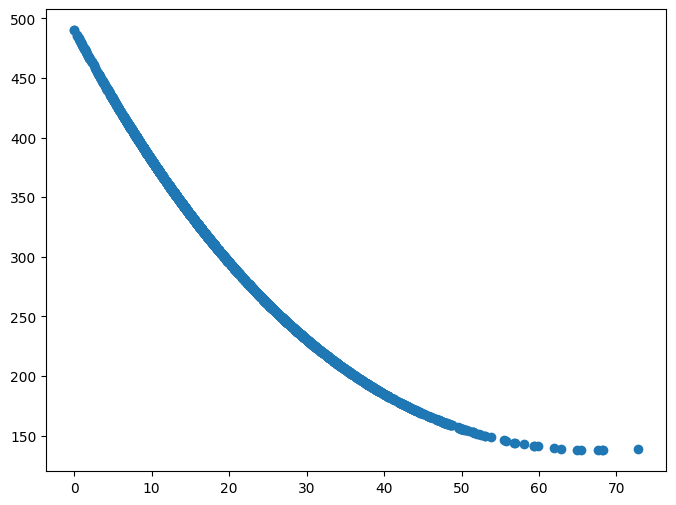

In [10]:
total_emission_CO2_per_km = 0
C = 0.55

km_travelled_per_car = data_2['Mean speed'] * data_2['Observed time']/1000
total_km_travelled = km_travelled_per_car.sum()

emissions_per_car_per_km = C * (891 - 22.1360 * data_2['Mean speed'] * 3.6 + 0.2346 * (data_2['Mean speed'] * 3.6) ** 2  - 0.0007 * (data_2['Mean speed'] * 3.6) ** 3)
emission_per_car = emissions_per_car_per_km*km_travelled_per_car

total_emission = emission_per_car.sum()

emission_per_km = total_emission/total_km_travelled

print(f"Total emissions: {round(total_emission, 2)} [gCO2]") #gCO2
print(f"Total distance travelled: {round(total_km_travelled,3)} [km]") # km
print(f"Emissions per distance: {round(emission_per_km,2)} [gC02/km]") #gCO2/km

emissions_per_car_per_km = emissions_per_car_per_km.to_numpy()
data3 = np.transpose(np.array([3.6 * data_2['Mean speed'].to_numpy(), emissions_per_car_per_km]))
data3 = data3[data3[:, 1].argsort()]

plt.figure(figsize=(8,6))
plt.scatter(data3[:,0], data3[:,1])

data_2["Vehicle type"].value_counts()

## Question 3

In [9]:
e_idle = 0.7
e_acc = 2.8
e_dec = 1.4
e_cruise = 1.8

time_car = data_2['Vehicle type'].map({"Car" : 1, "Motorcycle" : 0, "Heavy Vehicle" :0})*data_2['Observed time']
time_car = time_car.sum()
e_car = data_2['Vehicle type'].map({"Car" : 1, "Motorcycle" : 0, "Heavy Vehicle" :0})*data_2['Accel time']*e_acc + data_2['Vehicle type'].map({"Car" : 1, "Motorcycle" : 0, "Heavy Vehicle" : 0})*data_2['Decel time']*e_dec + data_2['Vehicle type'].map({"Car" : 1, "Motorcycle" : 0, "Heavy Vehicle" : 0})*data_2['Idle time']*e_idle + data_2['Vehicle type'].map({"Car" : 1, "Motorcycle" : 0, "Heavy Vehicle" : 0})*data_2['Cruise time']*e_cruise
tot_e_car= e_car.sum()

time_moto = data_2['Vehicle type'].map({"Car" : 0, "Motorcycle" : 1, "Heavy Vehicle" :0})*data_2['Observed time']
time_moto = time_moto.sum()
e_moto = data_2['Vehicle type'].map({"Car" : 0, "Motorcycle" : 0.5, "Heavy Vehicle" :0})*data_2['Accel time']*e_acc + data_2['Vehicle type'].map({"Car" : 0, "Motorcycle" : 0.5, "Heavy Vehicle" : 0})*data_2['Decel time']*e_dec + data_2['Vehicle type'].map({"Car" : 0, "Motorcycle" : 0.5, "Heavy Vehicle" : 0})*data_2['Idle time']*e_idle + data_2['Vehicle type'].map({"Car" : 0, "Motorcycle" : 0.5, "Heavy Vehicle" : 0})*data_2['Cruise time']*e_cruise
tot_e_moto= e_moto.sum()

time_heavy = data_2['Vehicle type'].map({"Car" : 0, "Motorcycle" : 0, "Heavy Vehicle" :1})*data_2['Observed time']
time_heavy = time_heavy.sum()
e_heavy = data_2['Vehicle type'].map({"Car" : 0, "Motorcycle" : 0, "Heavy Vehicle" :5})*data_2['Accel time']*e_acc + data_2['Vehicle type'].map({"Car" : 0, "Motorcycle" : 0, "Heavy Vehicle" : 5})*data_2['Decel time']*e_dec + data_2['Vehicle type'].map({"Car" : 0, "Motorcycle" : 0, "Heavy Vehicle" : 5})*data_2['Idle time']*e_idle + data_2['Vehicle type'].map({"Car" : 0, "Motorcycle" : 0, "Heavy Vehicle" : 5})*data_2['Cruise time']*e_cruise
tot_e_heavy= e_heavy.sum()

print("total time:", time_car, "emission", tot_e_car, "emission rate", tot_e_car/time_car)
print("total time:",time_moto, "emission", tot_e_moto, "emission rate", tot_e_moto/time_moto)
print("total time:", time_heavy, "emission", tot_e_heavy, "emission rate",tot_e_heavy/time_heavy)



total time: 164051.2 emission 236346.75999999978 emission rate 1.4406890044083784
total time: 54981.200000000004 emission 42198.339999999924 emission rate 0.7675048925814628
total time: 12059.6 emission 82379.79999999986 emission rate 6.831055756409819
